# 10-5. 단일표본 t-test:

당신은 매일 아침 동네 빵집에서 식빵을 구입해 왔다.

이 식빵의 무게는 500g이라고 표시되어 있다. 하지만 당신은 자신이 구매하는 빵이 500g이 맞는지 의구심이 들기 시작한다. 그래서 1개월간 식빵을 사운 뒤 매일 무게를 기록하였고 그 결과는 `bread` 데이터셋으로 저장하였다.

25일간 측정한 빵의 평균 무게는 480g이었다. 이 값을 가지고 식빵의 무게가 500g이 되지 않는다며 베이커리를 찾아가 컴플레인을 해야 할까?

## 01. 준비작업

### 1. 라이브러리 참조:

In [18]:
from hossam import load_data

from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np
from math import sqrt
from pandas import DataFrame

# 가설검정용 패키지:
from scipy.stats import t, ttest_1samp, normaltest

### 2. 그래프 초기화:

In [2]:
my_dpi = 200  # 이미지 선명도 (100~300)
font_path = r"\Users\itwill\OneDrive\문서\학원수업\NotoSansKR-Regular.ttf"  # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)      # 폰트 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname = font_path)    # 폰트 속성을 읽어옴
font_name = font_prop.get_name()    # 읽어온 속성에서 폰트의 이름만 추출

plt.rcParams['font.family'] = font_name # 그래프에 한글폰트 적용
plt.rcParams['font.size'] = 6          # 기본 폰트 크기
plt.rcParams['axes.unicode_minus'] = False  
    # 그래프에 마이너스 깨짐 방지 (한글 환경에선 필수)

### 3. 데이터 가져오기:

In [3]:
origin = load_data('bread')
origin.head()

[data] https://data.hossam.kr/data/lab10/bread.xlsx
[desc] 매일 아침 동네 빵집에서 식빵을 구입해 무게를 기록한 데이터
[!] Cannot read metadata


,무게
0,482
1,479
2,485
3,474
4,479


## #02. 가설검정 中 가정 확인

### 1. 정규성 확인

##### 1) by KDE plot:

C:\Users\itwill\AppData\Local\Temp\ipykernel_25396\2667595973.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.kdeplot(data=data, fill=False, alpha=0.5, palette='pastel')


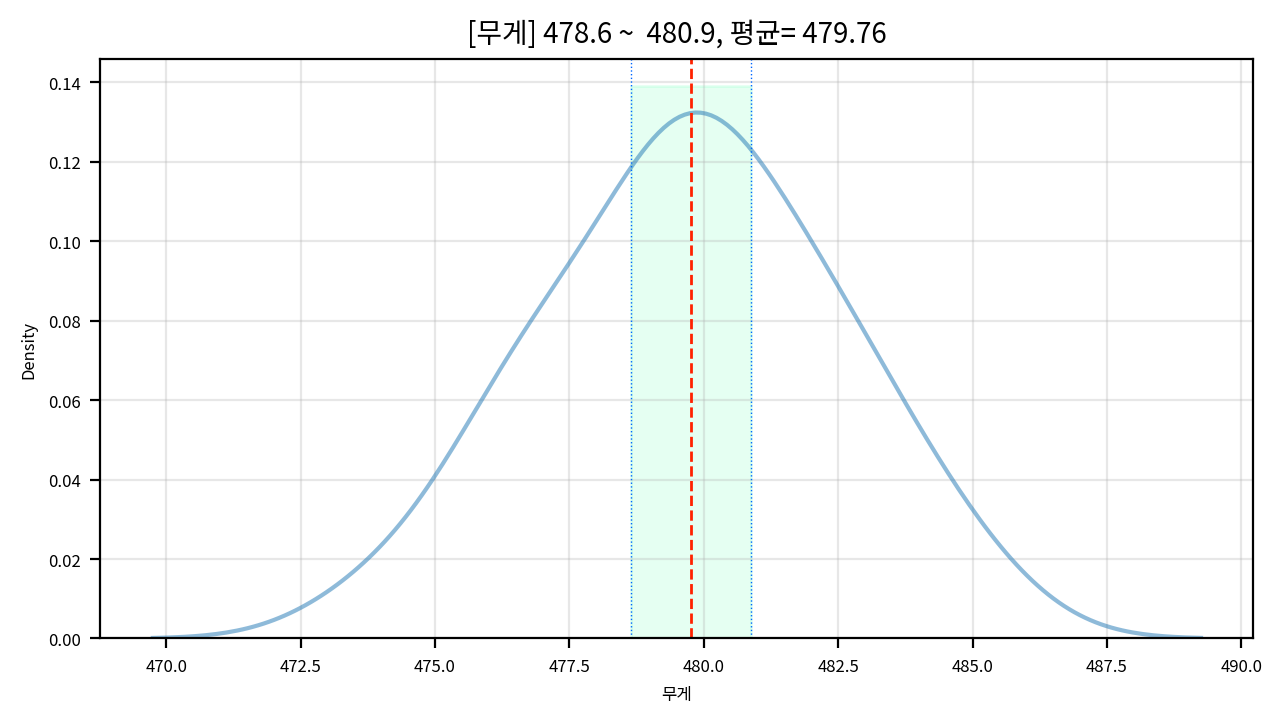

In [10]:
data = origin['무게']                   # 확인할 데이터 (컬럼단위)
max = data.max()                        # 최대값
dof = len(data) - 1                     # 자유도
clevel = 0.95                           # 신뢰수준
sp_mean = data.mean()                   # 표본평균
sp_std = data.std() # default: ddof=1   # 표본표준편차
sp_std_error = sp_std / sqrt(len(data)) # 표본표준오차

# 신뢰구간
cmin, cmax = t.interval(clevel, dof, loc = sp_mean, 
                        scale = sp_std_error)

# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) KDE plot 그리기:
sb.kdeplot(data=data, fill=False, alpha=0.5, palette='pastel')

# 2-1) 신뢰구간 범위 (cmin ~ cmax) 그리기:
ax.axvline(cmin, linestyle=":", color='#0066ff', linewidth=0.5)
ax.axvline(cmax, linestyle=":", color='#0066ff', linewidth=0.5)

# 2-2) 현재 축 범위 가져오기:
ymin, ymax = ax.get_ylim()
ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1, color='#00ff88')

# 2-3) 평균 표시:
ax.axvline(sp_mean, linestyle="--", color='#ff2200', linewidth=1)

# 3) 그래프 꾸미기:
ax.set_title(f"[{data.name}] {cmin:.1f} ~ {cmax: .1f}, 평균={sp_mean: 0.2f}", fontsize = 10)
ax.grid(True, alpha=0.3)     # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료

위에 코드는 `그래프 제목`에 신뢰구간, 평균 표시하고자 할 때 쓰면 되고

아래 코드는 `반복문` 써서 `그래프마다 peak에` 신뢰구간,평균 표시 원할 때 쓰면 됨:

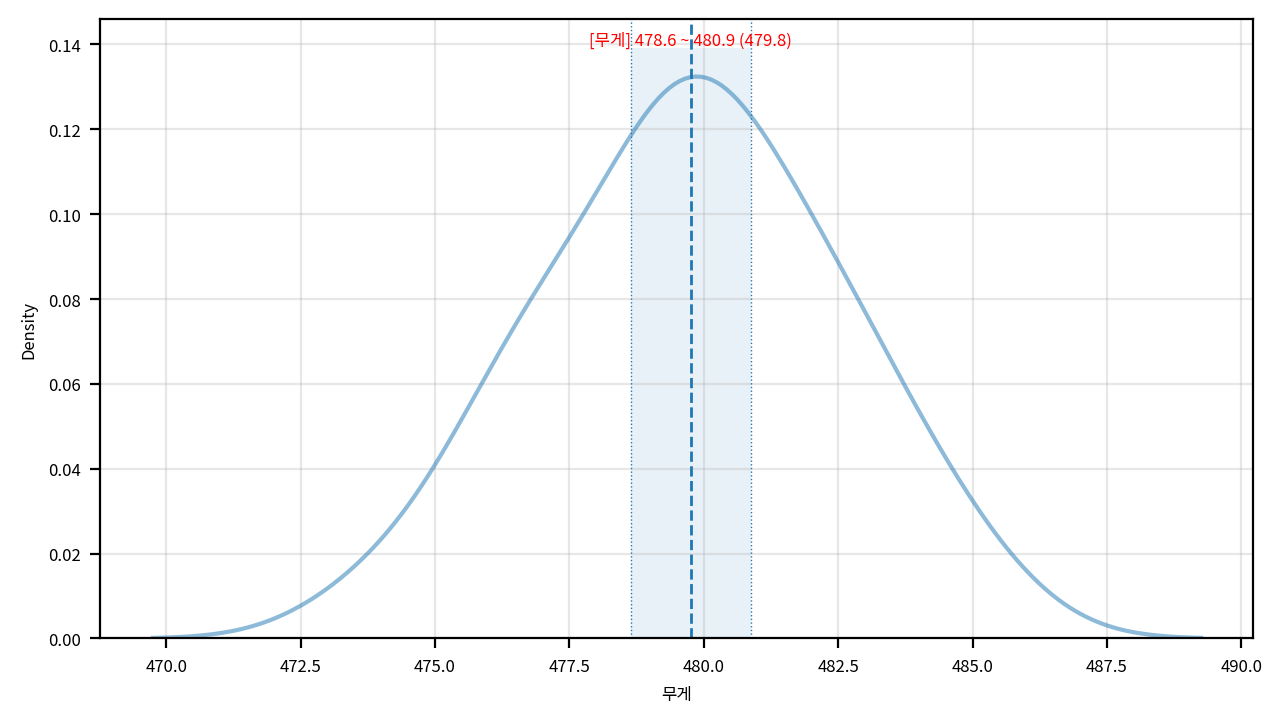

In [15]:
data = origin[['무게']] # 확인할 데이터

# 1) 그래프 초기화
width_px = 1280         # 그래프 가로 크기
height_px = 720         # 그래프 세로 크기
rows = 1                # 그래프 행 수
cols = 1                # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

for c in data.columns:

    # KDE Plot 그리기:
    sb.kdeplot(data=data, x=c, fill=False, alpha=0.5)

    # 신뢰구간:
    max = data[c].max()                        # 최대값
    clevel = 0.95                              # 신뢰수준
    dof = len(data[c]) - 1                     # 자유도
    sp_mean = data[c].mean()                   # 표본평균
    sp_std = data[c].std(ddof=1)               # 표본표준편차
    sp_std_error = sp_std / sqrt(len(data[c])) # 표본표준오차
    cmin, cmax = t.interval(clevel, dof, loc=sp_mean,
    scale=sp_std_error)

    ax.axvline(cmin, linestyle=':', linewidth=0.5)
    ax.axvline(cmax, linestyle=':', linewidth=0.5)

    # 평균 표시:
    ymin, ymax = ax.get_ylim()
    ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1)
    ax.axvline(sp_mean, linestyle='--', linewidth=1)

    # 텍스트 그리기:
    ax.text(
        x=(cmax-cmin)/2+cmin, 
        y=ymax,
        s="[%s] %0.1f ~ %0.1f (%0.1f)" % (c, cmin, cmax, sp_mean),
        horizontalalignment="center",
        verticalalignment="bottom",
        fontdict={"size": 6, "color": "red"})

# 3) 그래프 꾸미기
ax.grid(True, alpha=0.3)    # 배경 격자 표시/숨김

# 4) 출력
plt.tight_layout()          # 여백 제거
plt.show()                  # 그래프 화면 출력
plt.close()                 # 그래프 작업 종료


=> 평균(479.76) in 신뢰구간(478.6 ~ 480.9)

표본평균이 신뢰구간 범위에 속해 있으므로 표본평균이 모집단 평균과 큰 차이가 없음을 의미함

그러므로 내가 구입한 빵으로 이 빵집의 모든 빵에 대한 평균 무게를 추측해도 된다는 뜻.

### 2. 정규성 검정

> plotting으로도 볼 수 있지만 t-test ㄱㄱ
> - 정규성검사: p-value in H0(normalization)
> - p-value in H1(대립가설): 같음(target)? 
> - p-value in H1(대립가설): 작냐크냐(alternative)?

In [6]:
s, p = normaltest(origin['무게'])
"statistic: {0:.3f}, p-value: {1:.3f}, 정규성 충족 여부: {2}".format(s,
p, p > 0.05)

'statistic: 0.083, p-value: 0.959, 정규성 충족 여부: True'

In [19]:
data = origin[['무게']]         # 검사하려는 데이터 추출

equal_var_fields = []
normal_dist = True
report = []

for c in data.columns:
    s, p = normaltest(data[c])

    normalize = p > 0.05
    report.append({
        "field": c,
        "statistic": s,
        "p-value": p,
        "result": normalize
    })
    normal_dist = normal_dist and normalize

# 변수가 두 개 이상인 경우 등분산성 확인:
if len(data.columns) > 1:
    if normal_dist:
        n = "Bartlett"
        # 정규성을 충족할 경우의 검정방법:
        s, p = bartlett(*data.values.T)               # 모든 컬럼의 데이터를 한번에 전달
    else:
        n = "Levene" # 정규성을 충족하지 않을 경우의 검정방법:
        s, p = levene(*data.values.T, center='median')# 모든 컬럼의 데이터를 한번에 전달

    report.append({
        "field": n,
        "statistic": s,
        "p-value": p,
        "result": p > 0.05
    })

report_df = DataFrame(report).set_index('field')
report_df


,statistic,p-value,result
field,,,
무게,0.083295,0.959208,True


=> 정규도 만족, 데이터 신뢰가능 

> 단일표본의 대립가설 검증 ㄱㄱ:

### 3. 단일표본 t-test

빵의 평균무게: $\mu$

($H_0$, $\geq$ , $H_1$, $\lt$)
> 귀무: 500과 다르지않다, 대립(alternative): 500과 다르다
>
> target_value = 500

In [8]:
s, p = ttest_1samp(origin['무게'], 500)
"statistic:{0:.3f}, p-value:{1:.3f}, {2}가설 채택".format(s, p, '대립' if p<=0.05 else '귀무')

'statistic:-37.524, p-value:0.000, 대립가설 채택'

=> 옹.. 대립가설 즉 500이랑 다르다가 채택 됨. 

> 그럼 크냐? 아니냐? 판별 필요
>
> 귀무: 500보다 크지 않다, 대립: 500보다 크다
>
> alternative: greater :

In [9]:
s, p = ttest_1samp(origin['무게'], 500, alternative='greater')
"statistic:{0:.3f}, p-value:{1:.3f}, {2}가설 채택".format(s, p, '대립' if p<=0.05 else '귀무')

'statistic:-37.524, p-value:1.000, 귀무가설 채택'

결론: 무게 500보다 크지 않다 (작거나 같다)가 채택됨

그럼 500이랑 같지 않음은 위위에서 증명됬으니, **500보다 작다는게 밝혀진거임**

# 10-6. 
어떤 화학약품의 제조에 상표가 다른 두 종류의 원료가 사용되고 있다.

각 원료에서 주성분 A의 함량은 material 데이터셋에 정리되어 있다.

이 두 원료의 주성분 A의 함량이 다른지를 분석하라.

# 10-7.

## 문제 3:
`runner_diet` 데이터셋은 고등학교 육상선수 10명에게 감량훈련(2~4kg 정도)을 시킨 후 100m 달리기를 실시한 결과를 조사한 데이터이다. 이를 통해 고등학교 육상선수에게 체중감량을 시키면 달리기에 어떤 변화가 일어나는지 조사하고자 한다.

감량 전과 후에 달리기 속도에 차이가 있는지 분석하라.

## 문제 4:
`wrestler_diet` 데이터셋은 고등학교 레슬링 선수에게 체중감량을 시키면 체력에 어떤 변화가 일어나는지 조사하기 위하여, 어느 고등학교의 레슬링 선수 12명을 표본추출하여 감량시킨 후
얻은 데이터이다.

감량 전과 감량 후 간에 차이가 있는가의 대응비교를 악력, 윗몸일으키기, 턱걸이에 대하여 실시하고 분석하라.

# 10-7.

## 문제 1:
`blood_pressure` 데이터셋은 부인 15명을 대상으로 평상시 혈압을 측정한 뒤, 이들에게 이 피임약을 일정 기간 복용하게 한 후 이들의 혈압을 다시 측정한 결과를 기록한 데이터이다.

이 데이터를 통해 피임약 복용이 혈압에 영향을 주는지 분석하라.

> 독립변수: 1(피임약), 집단 수: 1(시간차 두고 표과 측정) -> 대응표본분석(paired)

In [69]:
from hossam import load_data
from pandas import melt, DataFrame, pivot_table
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
from math import sqrt

# 대응표본 가설검정용 패키지:
from scipy.stats import t, ttest_ind, normaltest, bartlett, levene, ttest_rel, mannwhitneyu
from statannotations.Annotator import Annotator

In [70]:
my_dpi = 200  # 이미지 선명도 (100~300)
font_path = r"\Users\itwill\OneDrive\문서\학원수업\NotoSansKR-Regular.ttf"  # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)      # 폰트 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname = font_path)    # 폰트 속성을 읽어옴
font_name = font_prop.get_name()    # 읽어온 속성에서 폰트의 이름만 추출

plt.rcParams['font.family'] = font_name # 그래프에 한글폰트 적용
plt.rcParams['font.size'] = 6          # 기본 폰트 크기
plt.rcParams['axes.unicode_minus'] = False  
    # 그래프에 마이너스 깨짐 방지 (한글 환경에선 필수)

In [22]:
origin = load_data('blood_pressure')

print("\n===== 데이터 크기 확인 =====")
print(f"데이터셋 크기: {origin.shape}")
print(f"열 갯수: {origin.shape[1]}")
print(f"행 갯수: {origin.shape[0]}")

print("\n===== 타입 확인 =====")
print(origin.info())

origin.head()

[data] https://data.hossam.kr/data/lab10_/blood_pressure.xlsx
[desc] 부인 15명을 대상으로 평상시 혈압을 측정한 뒤, 이들에게 이 피임약을 일정 기간 복용하게 한 후 이들의 혈압을 다시 측정한 결과를 기록한 데이터 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata

===== 데이터 크기 확인 =====
데이터셋 크기: (15, 2)
열 갯수: 2
행 갯수: 15

===== 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   복용전     15 non-null     int64
 1   복용후     15 non-null     int64
dtypes: int64(2)
memory usage: 372.0 bytes
None


,복용전,복용후
0,70,68
1,80,72
2,72,62
3,76,70
4,76,58


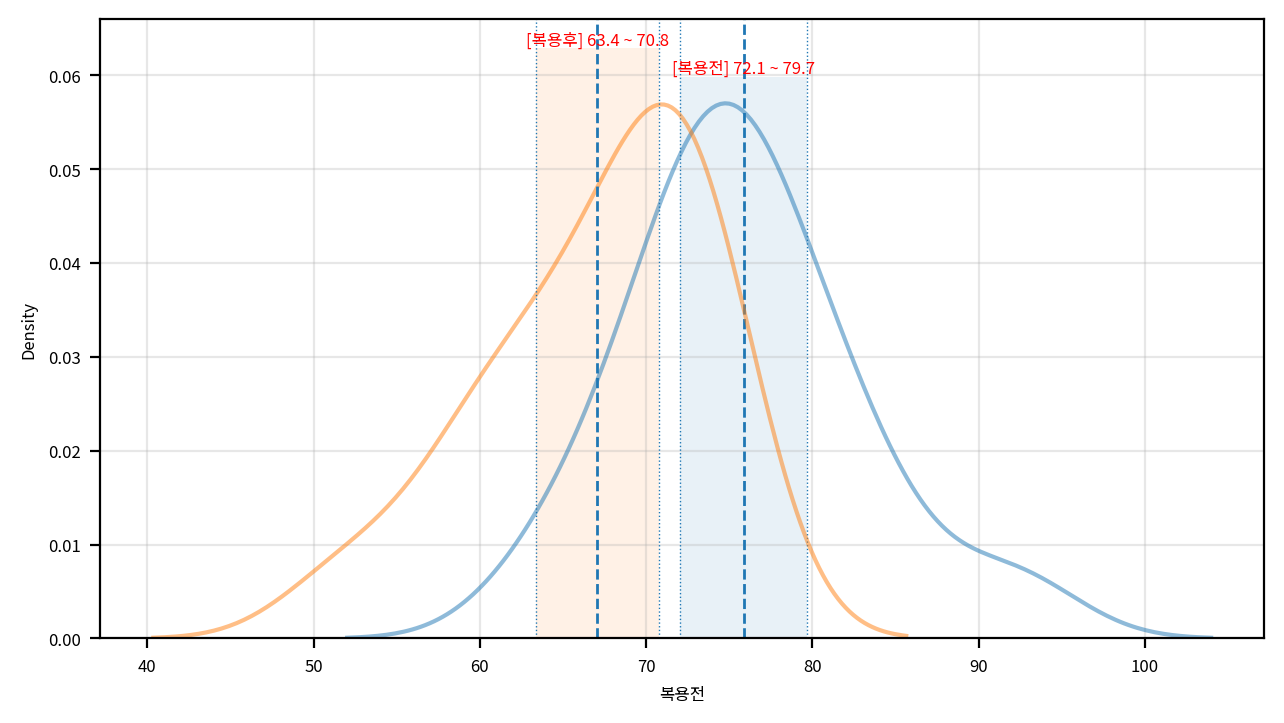

In [23]:
data = origin[['복용전', '복용후']]  # 확인할 데이터 (컬럼단위)

# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

for c in data.columns:
    # 2) KDE plot 그리기:
    sb.kdeplot(data=data, x=c, fill=False, alpha=0.5)

    # 2-1) 신뢰구간용 기본변수:
    max = data[c].max()                        # 최대값
    dof = len(data[c]) - 1                     # 자유도
    clevel = 0.95                           # 신뢰수준
    sp_mean = data[c].mean()                   # 표본평균
    sp_std = data[c].std() # default: ddof=1   # 표본표준편차
    sp_std_error = sp_std / sqrt(len(data[c])) # 표본표준오차

    # 2-2) 신뢰구간 x값:
    cmin, cmax = t.interval(clevel, dof, loc = sp_mean, scale = sp_std_error)

    ax.axvline(cmin, linestyle=":", linewidth=0.5) # cmin 경계선
    ax.axvline(cmax, linestyle=":", linewidth=0.5) # cmax 경계선

    # 2-3) 신뢰구간 y값:
    ymin, ymax = ax.get_ylim()
    ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1)

    # 2-4) 평균선 표시:
    ax.axvline(sp_mean, linestyle="--", linewidth=1)

    # 2-5) 텍스트 그리기 (statAnnotator 기능):
    ax.text(x = cmin + (cmax-cmin)/2,
            y=ymax,
            s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
            horizontalalignment = "center",
            verticalalignment = "bottom",
            fontdict = {"size": 6, "color": "red"})

# 3) 그래프 꾸미기: 
ax.grid(True, alpha=0.3)     # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료

> 복용 전, 후 둘 다 신뢰구간 안에 표본평균 있 -> 데이터셋 신뢰 ㅇㅇ

> 그래도 ttest의 검정 확인 ㄱㄱ:

In [24]:
data = origin[['복용전', '복용후']]

equal_var_fields = []
normal_dist = True
report = []

for c in data.columns:
    s, p = normaltest(data[c])

    normalize = p > 0.05
    report.append({
        "fields": c,
        "statistic": s,
        "p-value": p,
        "result": normalize
    })
    normal_dist = normal_dist and normalize

# 변수가 두개 이상일 때 확인해야될 등분산성:
if len(data.columns) > 1:
    # 정규성 충족할 때 등분산성 검정방법:
    if normal_dist:
        n = "Bartlett"
        s, p = bartlett(*data.values.T) # 모든 컬럼의 데이터 한번에
    # 정규성 충족 못할 때 등분산성 검정법:
    else:
        n = "Levene's"
        s, p = levene(*data.values.T, center='median')
        # : 정규성 충족 못할 땐 '기본값인 평균'으로 계산하면 안됨
    
    report.append({
        "fields": n,
        "statistic": s,
        "p-value": p,
        "result": p > 0.05
    })

report_df = DataFrame(report).set_index('fields')
report_df

,statistic,p-value,result
fields,,,
복용전,2.590682,0.273805,True
복용후,2.656338,0.264962,True
Bartlett,1.013185,0.314141,True


> hypothesis of t-test (normalized, homoscedasticity) confirmed.
>
> let's move on to t-test:

In [ ]:
# 대응표본의 t-test

# 귀무: 차이 없다, 대립: 차이 있다
s, p = ttest_rel(origin['복용전'], origin['복용후'], alternative='two-sided')
"statistic:{0:.3f}, p-value:{1:.3f}, {2}가설 채택".format(s, p, '대립' if p<=0.05 else '귀무')

'statistic:3.105, p-value:0.008, 대립가설 채택'

> 차이 있으니 누가 더 큰지 ttest ㄱㄱ

In [26]:
# 대응표본의 t-test

# 귀무: 작지않다 (크거나 같다), 대립: 전이 후보다 작다
s, p = ttest_rel(origin['복용전'], origin['복용후'], alternative='less')
"statistic:{0:.3f}, p-value:{1:.3f}, {2}가설 채택".format(s, p, '대립' if p<=0.05 else '귀무')

'statistic:3.105, p-value:0.996, 귀무가설 채택'

같지 않으면서 복용전이 후보다 작지 않으면 

`복용 전이 후보다 큰 경우만 있네. 일단 결론 남`

In [27]:
# 귀무: 작지않다 (크거나 같다), 대립: 전이 후보다 크다
s, p = ttest_rel(origin['복용전'], origin['복용후'], alternative='greater')
"statistic:{0:.3f}, p-value:{1:.3f}, {2}가설 채택".format(s, p, '대립' if p<=0.05 else '귀무')

'statistic:3.105, p-value:0.004, 대립가설 채택'

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

복용전 vs. 복용후: t-test paired samples, P_val:7.749e-03 t=3.105e+00


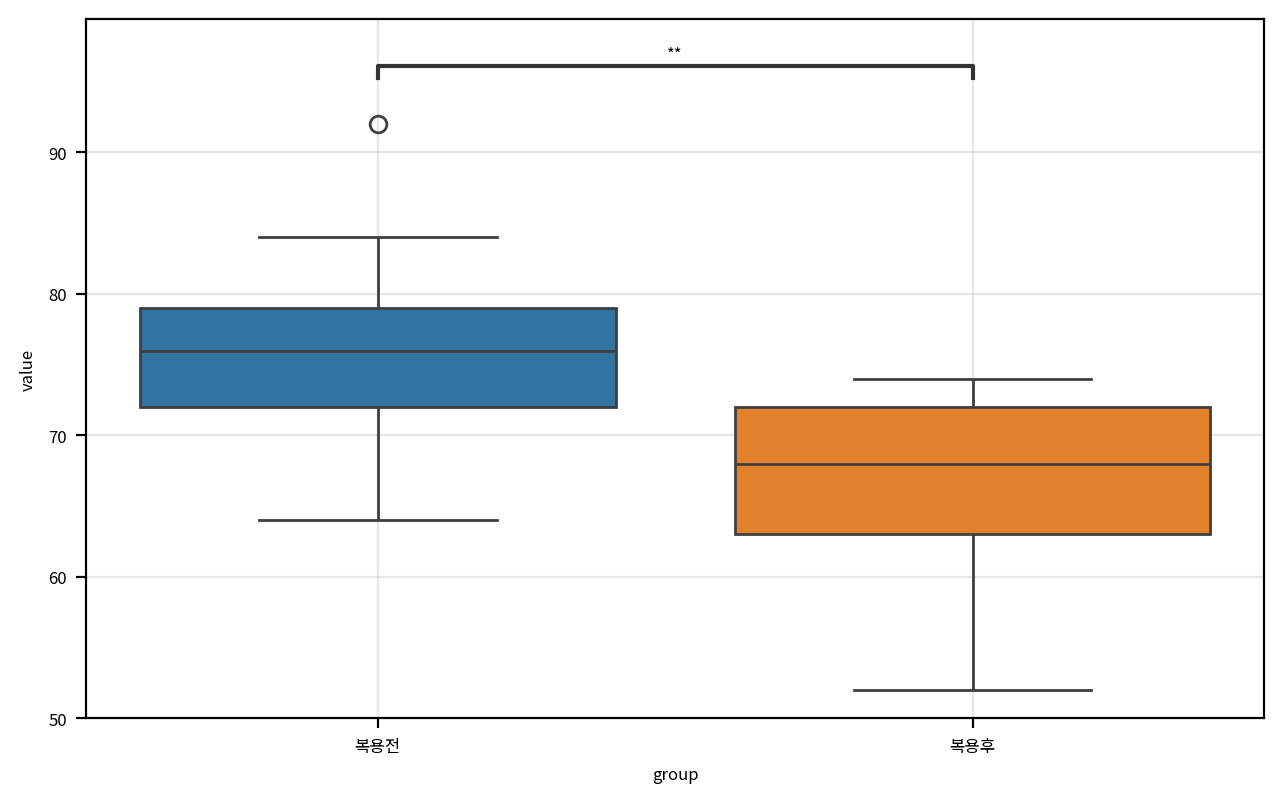

In [28]:
# 검정할 데이터 필드 이름:
fields = ['복용전', '복용후']

# 검정방법: 
# 't-test_ind', 't-test_paired', 't-test_welch', 'Mann-Whitney', 
# 'Mann-Whitney-gt', 'Mann-Whitney-ls', 'Levene', 'Wilcoxon', 'Kruskal'
test_method = 't-test_paired'

# 0) 데이터 전처리 (hue 쓰기 위해 melt로 재배치)
df = melt(origin[fields], value_vars = fields,
          var_name='group', value_name='value') #✅: hue용
df

# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280             # 그래프 가로 크기
height_px = 800             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) boxplot 그래프 그리기:
sb.boxplot(data = df, hue = 'group', x = 'group', y = 'value')

annotator = Annotator(ax, data=df, x = 'group', y = 'value',
                      pairs = [fields])   # hue종류(pairs는 2차원임!)
annotator.configure(test = test_method)         # 환경설정
annotator.apply_and_annotate()                   # 적용 및 표시

# 3) 그래프 꾸미기: 
ax.grid(True, alpha=0.3)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()                      # 여백 제거
plt.show()                              # 그래프 화면 출력
plt.close()                             # 그래프 작업 종료

## 문제 5:
서울시에서 정의하는 상권의 종류는 발달상권, 골목상권, 관광특구, 전통시장이 있다.

`commercial` 데이터는 서울시의 2023년 상권에 따른 분기별 매출액과 매출건수에 대한 자료이다.

주어진 데이터를 활용하여 서울시 골목상권의 2023년 상반기(1,2분기)와 하반기(3,4분기) 매출액이 어떤 차이를 보이는지 분석하라.

(주어진 데이터는 서울시에서 제공하는 집계가 완료된 데이터이므로 모든 결측치는 없는 상태이며 이상치도 실제 매출액 데이터이므로 별도의 정제 과정 없이 진행하는 것으로 한다.)

In [29]:
origin = load_data('commercial')

print("\n===== 데이터 크기 확인 =====")
print(f"데이터셋 크기: {origin.shape}")
print(f"열 갯수: {origin.shape[1]}")
print(f"행 갯수: {origin.shape[0]}")

print("\n===== 타입 확인 =====")
print(origin.info())

origin.head()

[data] https://data.hossam.kr/data/lab10_/commercial.xlsx
[desc] 서울시의 2023년 상권에 따른 분기별 매출액과 매출건수에 대한 자료 (출처: 서울 열린데이터 광장)
[!] Cannot read metadata

===== 데이터 크기 확인 =====
데이터셋 크기: (6222, 6)
열 갯수: 6
행 갯수: 6222

===== 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6222 entries, 0 to 6221
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   quarter          6222 non-null   int64 
 1   code             6222 non-null   int64 
 2   type             6222 non-null   object
 3   name             6222 non-null   object
 4   sales_amount     6222 non-null   int64 
 5   number_of_sales  6222 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 291.8+ KB
None


,quarter,code,type,name,sales_amount,number_of_sales
0,1,3001491,관광특구,이태원 관광특구,72523644100,2496865
1,1,3001492,관광특구,명동 남대문 북창동 다동 무교동 관광특구,283332346393,10246122
2,1,3001493,관광특구,동대문패션타운 관광특구,81696730221,2880324
3,1,3001494,관광특구,종로·청계 관광특구,212062656625,4960006
4,1,3001495,관광특구,잠실 관광특구,231338386876,5995166


In [32]:
print(origin['quarter'].unique())
print(origin['type'].unique())

[1 2 3 4]
['관광특구' '골목상권' '발달상권' '전통시장']


1. 매출건수와 매출액은 다중공선성이 있으니 ttest 시각화를 따로 내보자
- if 상반기 대비 후반기 변화 경향이 
  - 매출건수 ttest visualizatn = 매출액 ttest visualizatn:
    - 결론: 건수와 금액은 서로 다중공선선이 있을 수 있다.
  - else: 
    - 결론: 서로 관련 없다

**지역별(name)은 우선은 고려 하지 말자**

2. -> ttest1:
독립변수: 매출액(상반기) 
종속변수: 매출액(하반기)
**집단: 상반기(분기 1,2), 하반기(3,4 분기)** -> 대응표본 ttest!
전처리:
- `fl_amt = df.filter(['quarter', 'type', 'name', 'sales_amount'])`
- limit: type = '골목상권' 
  - `df2 = fl_amt.query("type == '골목상권'")`
- 상하반기 집단으로 그룹화: 
  - `df_1half = df2.query('quarter =< 2')`
  - `df_2half = df2.query('quarter > 2')`


1. ttest2:
독립변수: 매출건수(상반기)   
종속변수: 매출건수(하반기)
**집단: 상반기(분기 1,2), 하반기(3,4 분기)** -> 대응표본 ttest!
전처리:
- `fl_num = df.filter(['quarter', 'type', 'name', 'number_of_sales'])`
- limit: type = '골목상권'`-> query`
  - `df2 = fl_num.query("type == '골목상권'")`
- - 상하반기 집단으로 그룹화: 
  - `df_1half = df2.query('quarter =< 2')`
  - `df_2half = df2.query('quarter > 2')`

1. ttest3:
독립변수: 매출건수
종속변수: 매출액 -> 독립표본 ttest
- `fl_num = df.filter(['type', 'name', 'number_of_sales', 'sales_amount'])`

In [54]:
from hossam import load_data
from pandas import melt, DataFrame, merge
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
from math import sqrt

# 대응표본 가설검정용 패키지:
from scipy.stats import t, ttest_ind, normaltest, bartlett, levene, ttest_rel, mannwhitneyu
from statannotations.Annotator import Annotator

In [53]:
my_dpi = 200  # 이미지 선명도 (100~300)
font_path = r"\Users\itwill\OneDrive\문서\학원수업\NotoSansKR-Regular.ttf"  # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)      # 폰트 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname = font_path)    # 폰트 속성을 읽어옴
font_name = font_prop.get_name()    # 읽어온 속성에서 폰트의 이름만 추출

plt.rcParams['font.family'] = font_name # 그래프에 한글폰트 적용
plt.rcParams['font.size'] = 6          # 기본 폰트 크기
plt.rcParams['axes.unicode_minus'] = False  
    # 그래프에 마이너스 깨짐 방지 (한글 환경에선 필수)

## 문제 2:
`cookie_cats` 데이터 셋은 어느 모바일 게임의 버전에 따른 유저별 총 플레이 시간을 조사한 데이터이다.

개편 이전 버전을 A로 표시하고 개편 후 버전을 B로 표시하였다.

플레이 시간이 월등하게 많은 해비유저들을 제외한 일반유저들을 대상으로 이번 개편이 플레이 시간에 어떤 영향을 주었는지 알고자 한다.

게임의 개편이 유저들의 플레이 시간에 어떤 영향을 주었는지 분석하라.

In [54]:
from hossam import load_data
from pandas import melt, DataFrame, merge, pivot_table
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
from math import sqrt
import pandas as pd

# 대응표본 가설검정용 패키지:
from scipy.stats import t, ttest_ind, normaltest, bartlett, levene, ttest_rel, mannwhitneyu
from statannotations.Annotator import Annotator

In [2]:
my_dpi = 200  # 이미지 선명도 (100~300)
font_path = r"\Users\itwill\OneDrive\문서\학원수업\NotoSansKR-Regular.ttf"  # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)      # 폰트 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname = font_path)    # 폰트 속성을 읽어옴
font_name = font_prop.get_name()    # 읽어온 속성에서 폰트의 이름만 추출

plt.rcParams['font.family'] = font_name # 그래프에 한글폰트 적용
plt.rcParams['font.size'] = 6          # 기본 폰트 크기
plt.rcParams['axes.unicode_minus'] = False  
    # 그래프에 마이너스 깨짐 방지 (한글 환경에선 필수)

In [53]:
origin = load_data('cookie_cats')

print("\n===== 데이터 크기 확인 =====")
print(f"데이터셋 크기: {origin.shape}")
print(f"열 갯수: {origin.shape[1]}")
print(f"행 갯수: {origin.shape[0]}")

print("\n===== 타입 확인 =====")
print(origin.info())

origin.head(10)

[data] https://data.hossam.kr/data/lab10_/cookie_cats.xlsx
[desc] 어느 모바일 게임의 버전에 따른 유저별 총 플레이 시간을 조사한 데이터 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata

===== 데이터 크기 확인 =====
데이터셋 크기: (90189, 3)
열 갯수: 3
행 갯수: 90189

===== 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.1+ MB
None


,userid,version,sum_gamerounds
0,116,A,3
1,337,A,38
2,377,B,165
3,483,B,1
4,488,B,179
5,540,B,187
6,1066,A,0
7,1444,B,2
8,1574,B,108
9,1587,B,153


In [71]:
# userid를 인덱스화 + version을 컬럼으로 나누기 -> 피벗테이블
df = pivot_table(origin, index='userid', columns='version',
                 values='sum_gamerounds')
df

version,A,B
userid,,
116,3.0,NaN
337,38.0,NaN
377,NaN,165.0
483,NaN,1.0
488,NaN,179.0
...,...,...
9999441,NaN,97.0
9999479,NaN,30.0
9999710,28.0,NaN


- for 매출액 take into consideration, don't drop rows where NaN
- instead, fill NaN 0:

In [72]:
df2 = df.fillna(0)
df2

version,A,B
userid,,
116,3.0,0.0
337,38.0,0.0
377,0.0,165.0
483,0.0,1.0
488,0.0,179.0
...,...,...
9999441,0.0,97.0
9999479,0.0,30.0
9999710,28.0,0.0


outlier check (use subplot):

In [ ]:
# subplot 이용해서 분할그래프 만들기

# 1) 그래프 초기화
width_px = 2000         # 그래프 가로 크기
height_px = 1000        # 그래프 세로 크기
rows = 1             # 그래프 행 수 ≠ 1
cols = 2             # 그래프 열 수 ≠ 1
figsize = (width_px / my_dpi, height_px / my_dpi)

#
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) 그래프 그리기
sb.boxplot(data=✅, ax=ax[0][0], y='✅')
sb.histplot(data=✅, ax=ax[0][1], x='✅', 
            bins=5)
sb.kdeplot(data=✅, ax=ax[0][2], x='✅')
sb.lineplot(data=✅, ax=ax[1][0], x=✅.index, y='✅')
sb.barplot(data=✅, ax=ax[1][1], x=✅.index, y='✅', 
           estimator=np.sum✅)
sb.regplot(data=✅, ax=ax[1][2], x='✅', y='✅')

# 3) 그래프 꾸미기
# 전체 제목
fig.suptitle('✅', fontsize=14, color='#✅')

# 각 그래프 간의 가로(wspace),세로(hspace) 간격 지정
fig.subplots_adjust(wspace=0.2, hspace=0.2)

# 첫 번째 영역 그래프의 제목, 글자크기, 색상, 격자
ax[0][0].set_title("✅", color="#✅", fontsize=8, pad=8)
ax[0][0].grid()

# 두 번째 영역 그래프의 x축 설정 및 x,y축 라벨 지정, 격자
hist, bins = np.histogram(df['✅'], bins=✅)
bins = bins.round().astype("int")
ax[0][1].set_title("✅", color="#✅",
fontsize=8, pad=8)
ax[0][1].set_xticks(bins, bins)
ax[0][1].set_xlabel('✅')
ax[0][1].set_ylabel('✅')
ax[0][1].grid()

# 4) 출력
plt.tight_layout()      # 여백 제거
plt.show()              # 그래프 화면 출력
plt.close()             # 그래프 작업 종료